In [1]:
import warnings
from pylj import md, sample
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
def md_simulation(number_of_particles, temperature, box_length, number_of_steps, sample_frequency):
    # Creates the visualisation environment
    %matplotlib notebook
    # Initialise the system
    system = md.initialise(number_of_particles, temperature, box_length, 'square')
    # This sets the sampling class
    sample_system = sample.Scattering(system)
    # Start at time 0
    system.time = 0
    # Begin the molecular dynamics loop
    for i in range(0, number_of_steps):
        # At each step, calculate the forces on each particle and get acceleration
        system.compute_force()
        # Run the equations of motion integrator algorithm
        system.integrate(md.velocity_verlet)
        # Sample the thermodynamic and structural parameters of the system
        system.md_sample()
        # Allow the system to interact with a heat bath
        system.heat_bath(temperature)
        # Iterate the time
        system.time += system.timestep_length
        system.step += 1
        # At a given frequency sample the positions and plot the RDF
        if system.step % sample_frequency == 0:
            sample_system.update(system)
    return system

The `md_simulation` function takes five variables:
- The number of particles
- The simulation temperature
- The simulation cell vector
- The number of steps
- The sampling frequency (how often the image is updated)

<IPython.core.display.Javascript object>


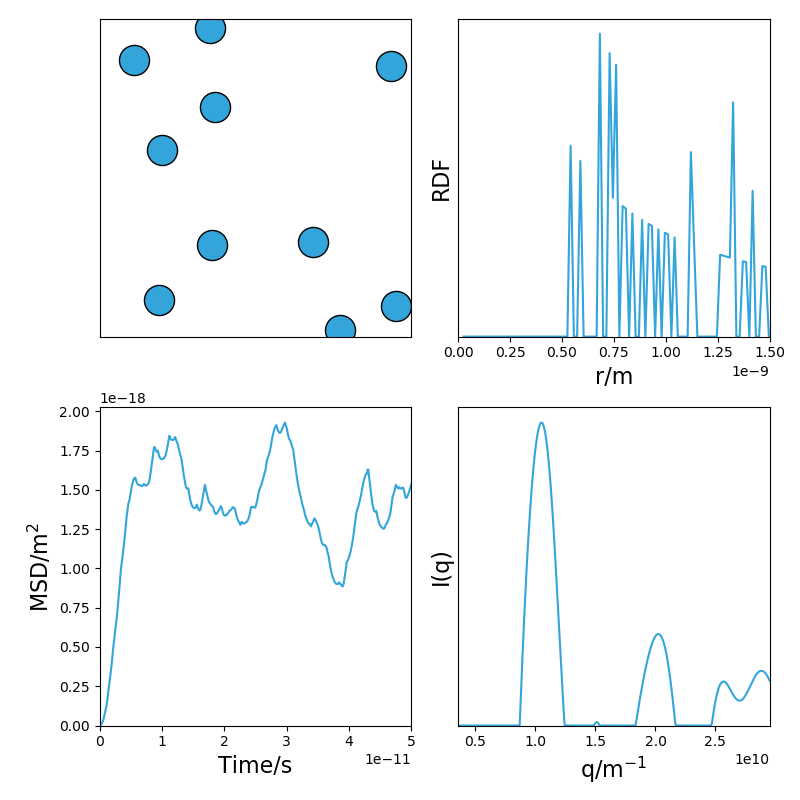

In [3]:
system = md_simulation(10, 273.15, 30, 5000, 50)